In [1]:
import os
from collections  import defaultdict
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
def load_from_pickle(file_path):
    """
    Load data from a pickle file.

    Parameters:
    - file_path: The path to the pickle file.

    Returns:
    - loaded_data: The loaded data.
    """
    with open(file_path, 'rb') as file:
        loaded_data = pickle.load(file)
    # print(f'Data has been loaded from {file_path}')
    return loaded_data

# Size Constraint

In [2]:

gaint_df = []


for problem in [
                'MaxCover',
                # 'MaxCut',
                # 'IM'
              ]:
    root_folder=os.path.join(problem,'data')
    # datasets=['Facebook','DBLP','Skitter','YouTube']
    
    datasets=os.listdir(root_folder)
    print(datasets)

    for dataset in datasets:
        # if dataset in ['Slashdot']:
        

        

        print('*'*20)
        print(dataset)
        dataset_path = os.path.join(root_folder,dataset)
        algorthims = os.listdir(dataset_path)

        # df ={'algorithm':[],'Size of Ground Set':[],'Ratio':[],'Queries':[]}
        df = defaultdict(list)
        # for algorthim in ['Quickfilter','SS','LeNSE','CombHelperTeacher','CombHelperStudent','GNNpruner']:
        for algorthim in ['Quickfilter','SS','CombHelperStudent','GNNpruner']:
          try:
            df_ = load_from_pickle(os.path.join(dataset_path,algorthim))

            # columns =['Ground set(Pruned)','Ratio(%)','Queries(%)']
            df['dataset'].append(dataset)
            if algorthim == 'CombHelperStudent':
               df['algorithm'].append('COMBHelper')

            elif algorthim =='Quickfilter':
               df['algorithm'].append('QuickPrune(OURS)')

            elif algorthim =='GNNpruner':
               df['algorithm'].append('GNNPruner')
               
            else:
              df['algorithm'].append(algorthim)
            
            df['Ratio'].append(df_['Ratio(%)'].iloc[0])
            df['Size of Ground Set'].append(df_['Pruned Ground set(%)'].iloc[0])
            df['TimeToPrune'].append(df_['TimeToPrune'].iloc[0])
            # df['Multibudget'].append(df_['Multibudget'].iloc[0])
            
            
            # df['Objective Value(Unpruned)'].append(df_['Objective Value(Unpruned)'].iloc[0])
            # df['Objective Value(Pruned)'].append(df_['Objective Value(Pruned)'].iloc[0])
            # df['Queries'].append(df_['Queries(%)'].iloc[0].zfill(4))
            # df['Queries'].append(df_['Queries(%)'].iloc[0])
          except:
            pass
          # else:
          #    pass
      # print(df)
        df = pd.DataFrame(df)
        # df['Queries'] = df['Queries'].apply(lambda x: f"{x:.4f}")
        df['Size of Ground Set']=df['Size of Ground Set'].round(4)
        # df['Queries'] = df['Queries'].round(4)
        # print(df)
        # print('-'*20)
        gaint_df.append(df)




['Slashdot', 'YouTube', 'Deezer', 'Skitter', 'DBLP', 'Facebook', 'Twitter', 'Wiki']
********************
Slashdot
********************
YouTube
********************
Deezer
********************
Skitter
********************
DBLP
********************
Facebook
********************
Twitter
********************
Wiki


In [ ]:
gaint_df=pd.concat(gaint_df)

In [ ]:
gaint_df

In [ ]:
df_filtered =gaint_df[gaint_df['dataset']=='YouTube']
df_filtered

In [ ]:
df_filtered =gaint_df[gaint_df['dataset']=='YouTube']
plt.figure(dpi=200)
sns.barplot(x='algorithm',y='TimeToPrune',data= df_filtered)
plt.yscale('log')
plt.ylabel('Time to Prune (log scale)')

In [3]:
gcomb = { 'MaxCover': [['Facebook', 92.7, 93],
                       ['Wiki', 99, 97],
                       ['Deezer', 99.4, 87],
                       ['Slashdot', 100, 98],
                       ['Twitter', 99.7, 83],
                       ['DBLP', 99.9, 93.0],
                       ['YouTube', 99.8, 93],
                       ['Skitter', 99.9, 90.00]],

          'MaxCut':[['Facebook', 81.30, 5],
                    ['Wiki', 92, 4],
                    ['Deezer', 85, 1],
                    ['Slashdot', 63.20, 1],
                    ['Twitter', 62.80, 1],
                    ['DBLP', 64.60, 1],
                    ['YouTube', 53.6, 1],
                    ['Skitter', 42.70, 1]],

          'IM':[['Facebook', 95.1, 27],
                ['Wiki', 96.9, 10],
                ['Deezer', 80.5, 5.00],
                ['Slashdot', 96.6, 2.00],
                ['Twitter', 92.0, 2.00],
                ['DBLP', 86.3, 1],
                ['YouTube', 93.3, 1],
                ['Skitter', 88.3, 1]],
}

lense = { 'MaxCover': [['Facebook', 96.6, 93.00],
                       ['Wiki', 109.4, 66],
                       ['Deezer', 97.9, 25],
                       ['Slashdot', 97.9, 31],
                       ['Twitter', 98.9, 67],
                       ['DBLP', 99.0, 10],
                       ['YouTube', 98.2, 21],
                       ['Skitter', 97.6, 30.00]],

          'MaxCut':[['Facebook', 100, 84.62],
                    ['Wiki', 98.10, 61],
                    ['Deezer', 97.5, 26],
                    ['Slashdot', 99.00, 38],
                    ['Twitter', 98.70, 52],
                    ['DBLP', 99.3, 8],
                    ['YouTube', 98.7, 21.00],
                    ['Skitter', 97.4, 29.00]],

          'IM':[['Facebook', 97.9, 91],
                ['Wiki', 96.0, 49],
                ['Deezer', 97.2, 24],
                ['Slashdot', 96.6, 23],
                ['Twitter', 96.6, 60.00],
                ['DBLP', 96.9, 21],
                ['YouTube', 97.1, 25],
                ['Skitter', 98.3, 22]],
}


df = defaultdict(list)
for dataset,ratio,ground_set in gcomb[problem]:
    df['algorithm'].append('GCOMB-P')
    df['dataset'].append(dataset)
    df['Ratio'].append(ratio)
    df['Size of Ground Set'].append(ground_set)

df = pd.DataFrame(df)
gaint_df.append(df)
df = defaultdict(list)
for dataset,ratio,ground_set in lense[problem]:
    df['algorithm'].append('LeNSE')
    df['dataset'].append(dataset)
    df['Ratio'].append(ratio)
    df['Size of Ground Set'].append(ground_set)
df = pd.DataFrame(df)
gaint_df.append(df)   

In [5]:
gaint_df = pd.concat(gaint_df)

In [ ]:
df = df[gaint_df.is]

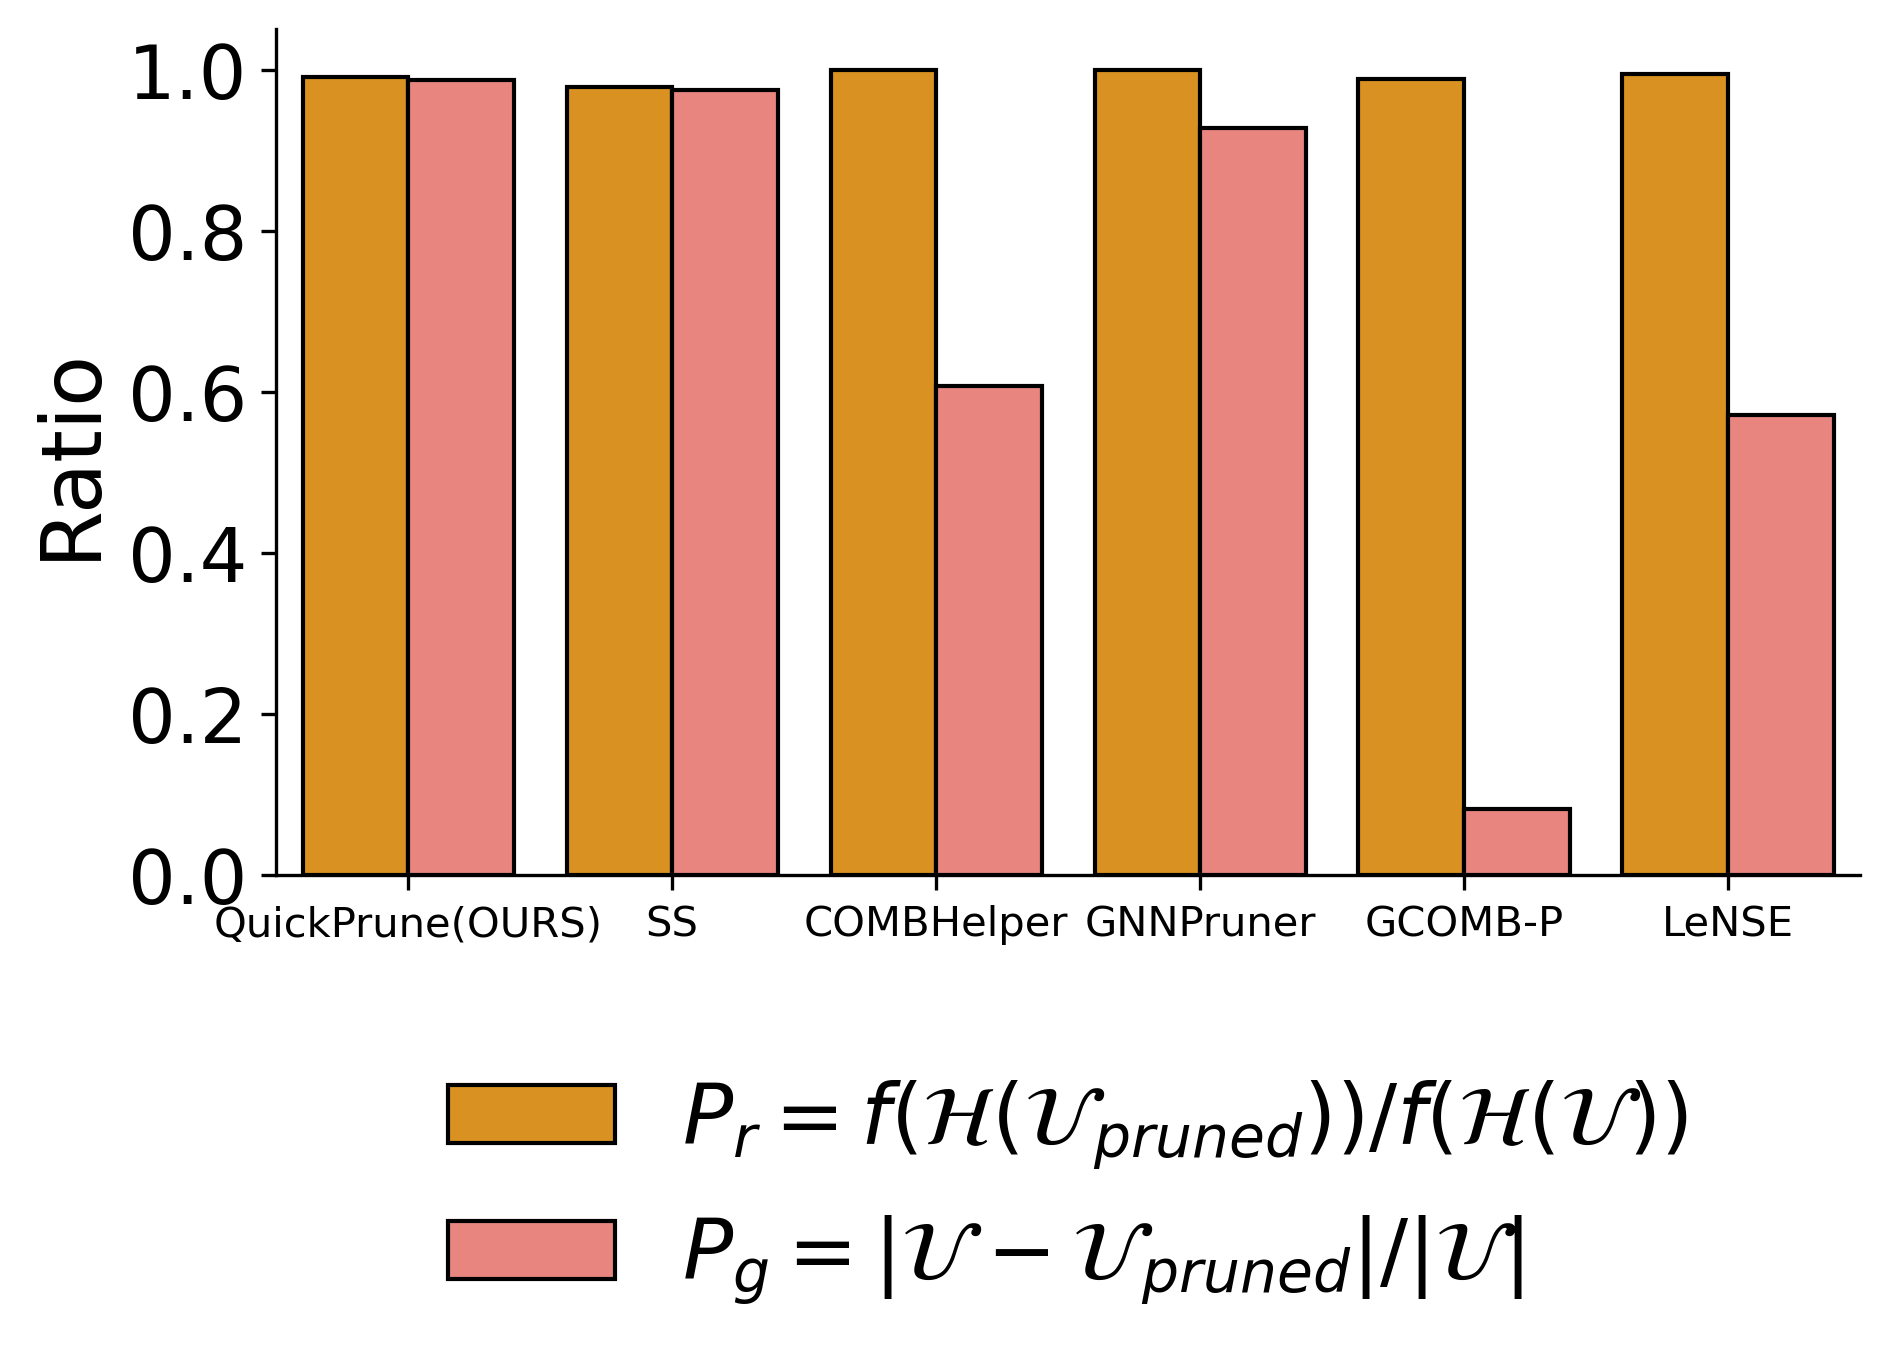

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Sample dataset (replace this with your actual DataFrame)
df = gaint_df.copy()

# Define the specific order for datasets
dataset_order = ['YouTube']

# Convert the dataset column to a categorical type with the specified order
df['RatioFrac'] = df['Ratio']/100
df['Size of Ground SetFrac'] = 1- df['Size of Ground Set']/100
df['dataset'] = pd.Categorical(df['dataset'], categories=dataset_order, ordered=True)

# Prepare the data for plotting by melting it
df_melted = pd.melt(df, id_vars=['algorithm'], value_vars=['RatioFrac', 'Size of Ground SetFrac'], 
                    var_name='Metric', value_name='Value')

# Create the plot
plt.figure(dpi=300)
bar_plot = sns.barplot(x='algorithm', y='Value', 
                       hue='Metric', data=df_melted, 
                       palette=['#f79903','#f9766e'],
                       errorbar=None,
                       edgecolor='black')


# Hatches to apply
# hatches = ['/', '*', '\\', '-', '+', 'x']  # Modify based on the number of algorithms

# # Apply hatches to consecutive bars
# for i, bar in enumerate(bar_plot.patches):
#     hatch_index = i // 2  # Each algorithm has two consecutive bars, so we apply the same hatch for each pair
#     bar.set_hatch(hatches[hatch_index % len(hatches)])  

fontsize =20 
# Customize the plot

plt.ylabel('Ratio',fontsize=20)
plt.xlabel('')
plt.xticks()
plt.yticks(fontsize =18)
# plt.yscale('log')
sns.despine()

plt.legend(['$P_r=f(\mathcal{H}(\mathcal{U}_{pruned}))/f(\mathcal{H}(\mathcal{U}))$','$P_g=|\mathcal{U}-\mathcal{U}_{pruned}|/|\mathcal{U}|$'],loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=1,fontsize=fontsize,frameon=False)
# plt.legend(['$P_r$','$P_g$'],frameon=False)


plt.tight_layout()
plt.savefig(f'{problem}_performance.pdf',bbox_inches='tight', dpi=300)
# Show the plot
plt.show()




In [ ]:
# # Prepare the plot
# plt.figure(dpi=300, figsize=(18, 10))

# # Filter the DataFrame to include only the datasets from the specified order
# df = df[df['dataset'].isin(dataset_order)]

# # Create a custom color palette
# custom_palette = sns.color_palette("Set2", n_colors=len(df['algorithm'].unique()))

# # algorithm_colors = {
# #     'QuickPruner': '#47535f',  # Muted blue-gray
# #     'SS': '#42c0fa',  # Light blue
# #     'COMBHelper': '#f79903',  # Vibrant orange
# #     'GCOMB-P': '#3ac050',  # Bright green
# #     'LeNSE': '#f9766e',  # Warm coral
# #     'GNNPruner': '#670067',  # Dark purple
# # }

# algorithm_colors = {
#     'QuickPruner': '#8fa7b3',  # Soft blue-gray
#     'SS': '#80d4f9',  # Light pastel blue
#     'COMBHelper': '#f7b761',  # Soft orange
#     'GCOMB-P': '#81d996',  # Pastel green
#     'LeNSE': '#f9766e',  # Warm coral (same as before)
#     'GNNPruner': '#b066b3',  # Soft purple
# }

# # Create a grouped bar plot with increased bar width and edge width
# bar_plot = sns.barplot(
#     x='dataset', 
#     y='Drop', 
#     hue='algorithm',  # Each algorithm will be represented with a different color
#     data=df, 
#     palette=algorithm_colors,  # Use the custom color palette
#     edgecolor='#333333',  # Darker edge color (dark gray)
#     linewidth=2,  # Increase edge width
#     width=0.95  # Increase this value to make the bars wider
# )

# values = []

# for dataset in dataset_order:
#      temp_df=df[df['dataset']==dataset]
#      for algo in ['QuickPruner','SS','COMBHelper','GNNPruner','GCOMB-P','LeNSE']:
          
#         try:
#             val = temp_df[temp_df['algorithm']==algo]['Size of Ground Set'].iloc[0]
#             values.append(val)
#         except:
#             values.append('NA')

# print(values)
        
# # Define hatch patterns for the algorithms
# hatches = ['/', '*', '|', '-', '+', 'x']  # Modify based on the number of algorithms

# # Apply hatches to each bar
# for i, bar in enumerate(bar_plot.patches):
#     # bar.set_hatch(hatches[i % len(hatches)])  # Cycle through the hatches    
#     bar.set_hatch('/')  # Cycle through the hatches 



# # Add annotations on top of each bar
# patches = []
# for idx,p in enumerate(bar_plot.patches):
#      patches.append((p.get_x(),p))

# patches.sort()



# for idx,p in enumerate(patches):
#     p = p[1]
#     bar_plot.annotate(
#         f'$P_g=${values[idx]}',  # Get the value from the "Size of ground set" column
#         (p.get_x() + p.get_width() / 2., p.get_height()),  # Position of the text
#         ha='center', 
#         va='bottom',  # Place text above the bar
#         fontsize=30,
#         color='black',
#         xytext=(0, 5),  # Slightly above the bar
#         textcoords='offset points',
#         rotation=70
#     )


# plt.ylim(97,100)

# Customize plot
# fontsize = 30
# # plt.xlabel('Drop from optimal', fontsize=fontsize)
# plt.xlabel('')

# plt.ylabel('Ratio', fontsize=fontsize+10)
# plt.xticks(fontsize=fontsize+10)  # Rotate x-axis labels for better readability
# plt.yticks(fontsize=fontsize)
# # plt.legend(frameon=False, loc='best', ncol=1, fontsize=30)


# plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3,fontsize=35)
# # plt.grid(alpha=0.7, linestyle='--')
# plt.tight_layout()

# # Show the plot
# sns.despine()
# plt.savefig(f'{problem}_performance.pdf',bbox_inches='tight', dpi=300)
# plt.show()

In [ ]:
len(patches)

# Ratio

In [ ]:
for problem in [
                'MaxCover',
                'MaxCut',
                'IM'
              ]:
    root_folder=os.path.join(problem,'data')
    # datasets=['Facebook','DBLP','Skitter','YouTube']
    
    datasets=os.listdir(root_folder)
    print(datasets)
    df = defaultdict(list)
    for dataset in datasets:
        

        

        # print('*'*20)
        # print(dataset)
        dataset_path = os.path.join(root_folder,dataset)
        algorthims = os.listdir(dataset_path)

        # df ={'algorithm':[],'Size of Ground Set':[],'Ratio':[],'Queries':[]}
        
        # for algorthim in ['Quickfilter','SS','LeNSE','CombHelperTeacher','CombHelperStudent','GNNpruner']:
        for algorthim in ['SS','Quickfilter']:
          try:
            df_ = load_from_pickle(os.path.join(dataset_path,algorthim))
            df['algorithm'].append(algorthim)
            df['dataset'].append(dataset)
            df['QueriesToPrune'].append(df_['QueriesToPrune'].iloc[0])


          except:
            pass
    df = pd.DataFrame(df)
    # df['Queries'] = df['Queries'].apply(lambda x: f"{x:.4f}")
    # df['Size of Ground Set']=df['Size of Ground Set'].round(4) 
    # df['Queries'] = df['Queries'].round(4)

    dataset_order = ['Facebook', 'Wiki','Deezer','Slashdot','Twitter','DBLP','YouTube','Skitter']
    # Convert the dataset column to a categorical type with the specified order
    df['dataset'] = pd.Categorical(df['dataset'], categories=dataset_order, ordered=True)
    print(df)
    # print('-'*20)

    # Pivot the dataframe to have 'SS' and 'Quickfilter' as columns
    df_pivot = df.pivot(index='dataset', columns='algorithm', values='QueriesToPrune')

    # Calculate the ratio of Quickfilter/SS
    df_pivot['Ratio'] =  df_pivot['SS']/df_pivot['Quickfilter'] 

    # Reset the index for plotting
    df_pivot.reset_index(inplace=True)
    import matplotlib.pyplot as plt
    import seaborn as sns

    # Assuming df_pivot is already defined
    plt.figure(dpi=300, figsize=(8, 4))
    ax = sns.barplot(x='dataset', y='Ratio', data=df_pivot, 
                     palette=sns.color_palette("Spectral"),
                     edgecolor='black')

    # # Set a single hatch pattern (e.g., '/' or 'x') for all bars
    # hatch = '/'  # Change this to any desired hatch pattern
    # edge_color = 'black'  # Color for the edges

    # # Apply the same hatch and edge color to each bar
    # for bar in ax.patches:
    #     bar.set_hatch(hatch)
    #     bar.set_edgecolor(edge_color)  # Set the edge color
    #     bar.set_linewidth(1.5)  # Optional: Set the linewidth of the edges

    # Adding the value labels on top of the bars
    for bar in ax.patches:
        yval = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            yval,  # Position the text at the height of the bar
            f'{yval:.0f}',  # Format the value to 2 decimal places
            ha='center',  # Center the text horizontally
            va='bottom',  # Position the text just above the bar
            fontsize=16,  # Optional: Font size for the labels
            color='black'  # Optional: Color for the labels
        )

    # Set the labels and title
    plt.xlabel('')
    plt.ylabel('Quries (SS/QP)', fontsize=20)
    plt.xticks(rotation=65, fontsize=20)
    plt.yticks(fontsize=20)
    # Turn off y-axis ticks and labels
    plt.yticks([])

    # Adjust the layout and remove the top and right spines
    plt.tight_layout()
    sns.despine()

    plt.savefig(f'{problem}.pdf', bbox_inches='tight', dpi=300)
    # Show the plot
    plt.show()
    break


In [ ]:
df_pivot

# Multi Budget vs Single Budget

In [ ]:
import os
from collections import defaultdict
for problem in [
                'MaxCover',
                'MaxCut',
                'IM'
              ]:
    image_folder = f'{problem}/figures'
    os.makedirs(image_folder,exist_ok=True)
    root_folder=os.path.join(problem,'data')
    # datasets=['Facebook','DBLP','Skitter','YouTube']
    for folder in [
                    # 'knapsack',
                    'knapsack_multi'
                    ]:
        datasets=os.listdir(root_folder)

        
        # df ={'algorithm':[],'Size of Ground Set':[],'Ratio':[],'Queries':[]}
        df =defaultdict(list)

        for dataset in datasets:

            # print('*'*20)
            # print(dataset)
            dataset_path = os.path.join(root_folder,dataset)
            print(dataset_path)
            try:
                # print(os.path.join(dataset_path,folder,'Quickfilter_degree'))
                # df_ = load_from_pickle(os.path.join(dataset_path,folder,'GNNpruner'))
                df_ = load_from_pickle(os.path.join(dataset_path,folder,'Quickfilter_aistats'))
                
                df_['Budget'] = [10,30,50,70,90,100]
                # print(,folder,df_['Dataset'].iloc[0])
                # df['dataset'].append(dataset)
                # # df['algorithm'].append('QS')
                # # df['Delta'].append(df_['Delta'].iloc[0])
                # df['Size of Ground Set'].append(df_['Pruned Ground set(%)'].iloc[0])
                
                # df['Ratio'].append(df_['Ratio(%)'].iloc[0])
                # # df['Queries'].append(df_['Queries(%)'].iloc[0])
                plt.figure(dpi=200, figsize=(8,6))

                # Scatter for Multi-Budget
                plt.scatter(df_['Budget'], df_['Ratio Multi'], marker='o', s=500, color='blue', alpha=0.7)
                plt.plot(df_['Budget'], df_['Ratio Multi'], linestyle='--', color='blue', 
                        label=f"Multi $(P_g={df_['Pruned Ground set Multi(%)'].iloc[0]:.2f}\%)$")

                # Scatter for Single-Budget
                plt.scatter(df_['Budget'], df_['Ratio Single'], marker='*', s=600, color='red', alpha=0.7)
                plt.plot(df_['Budget'], df_['Ratio Single'], linestyle='--',color='red', 
                        label=f"Single $(P_g ={df_['Pruned Ground set Single(%)'].iloc[0]:.2f}\%)$")


                fontsize = 30
                # Adding grid, legend, and style
                plt.grid(alpha=0.7, linestyle='--')
                sns.despine()
                plt.legend(frameon = False,fontsize = fontsize)
                plt.title(df_['Dataset'].iloc[0],fontsize = fontsize+4)
                plt.xlabel('Budgets', fontsize=fontsize )
                plt.ylabel('Ratio (%)', fontsize=fontsize)
                plt.xticks(fontsize=fontsize )
                plt.yticks(fontsize=fontsize )
                plt.locator_params(nbins=6)
                
                file_name = os.path.join(image_folder,df_['Dataset'].iloc[0])
                
                # plt.savefig(f'{file_name}', bbox_inches='tight')
                plt.savefig(f'{file_name}.pdf', bbox_inches='tight',dpi=300)

                plt.close()
            except:
                pass
                
        # # print(df)
        # df = pd.DataFrame(df)
        # print(df)
        # # print('-'*20)


# TOP-K

In [ ]:
import os
from collections import defaultdict
for problem in [
                'MaxCover',
                # 'MaxCut',
                # 'IM'
              ]:
    image_folder = f'{problem}/figures'
    os.makedirs(image_folder,exist_ok=True)
    root_folder=os.path.join(problem,'data')
    
    for folder in [
                    # 'knapsack',
                    'Knapsack_GNN',
                    # 'knapsack_multi'
                    ]:
        datasets=os.listdir(root_folder)

        
        # df ={'algorithm':[],'Size of Ground Set':[],'Ratio':[],'Queries':[]}
        df =defaultdict(list)

        for dataset in datasets:

            # print('*'*20)
            # print(dataset)
            dataset_path = os.path.join(root_folder,dataset)
            print(dataset_path)
            try:
                # print(os.path.join(dataset_path,folder,'Quickfilter_degree'))
                df_ = load_from_pickle(os.path.join(dataset_path,folder,'GNNpruner_aistats'))
                # df_ = load_from_pickle(os.path.join(dataset_path,folder,'Quickfilter_degree'))
                # df_ = load_from_pickle(os.path.join(dataset_path,folder,'Quickfilter_aistats'))
                print(folder,df_['Dataset'].iloc[-1])
                df['dataset'].append(dataset)
                ## GNN
                df['Ratio(%)'].append(df_['Ratio(%)'].iloc[-1])
                df['Pruned Ground set(%)'].append(df_['Pruned Ground set(%)'].iloc[-1])
                

                # 'Pruned Ground set Single(%)'
                # # df[''].append()
                # df['Ratio Single'].append(df_['Ratio Single'].iloc[-1])
                # df['Pruned Ground set Single(%)'].append(df_['Pruned Ground set Single(%)'].iloc[-1])
                # df['Ratio Single(TOP-K)'].append(df_['Ratio Single(TOP-K)'].iloc[-1])
                
                
            except:
                pass

df = pd.DataFrame(df)
# print(df)

# print(df[df['dataset'].isin(['Facebook','Wiki','Deezer','Slashdot','Twitter','DBLP','YouTube','Skitter'])] )
# List of datasets
datasets = ['Facebook', 'Wiki', 'Deezer', 'Slashdot', 'Twitter', 'DBLP', 'YouTube', 'Skitter']

# Loop through each dataset and print the filtered DataFrame
for dataset in datasets:
    # print(f"\nData for {dataset}:")
    print(df[df['dataset'] == dataset])

In [ ]:
df_

# Split

In [ ]:
Ground_set = {
    'Facebook': 3398,
    'Wiki': 6349,
    'Deezer': 53555,
    'Slashdot':67677,
    'Twitter': 80779,
    'DBLP':314818,
    'YouTube':1094439,
    'Skitter': 1694024

}

data_MVC_Lense = {
    'Facebook': 300,
    'Wiki': 300,
    'Deezer': 500,
    'Slashdot': 500,
    'Twitter': 1000,
    'DBLP': 1000,
    'YouTube': 1250,
    'Skitter': 750
}

data_IM_Lense = {
    'Facebook': 300,
    'Wiki': 300,
    'Deezer': 500,
    'Slashdot': 500,
    'Twitter': 1000,
    'DBLP': 1000,
    'YouTube': 750,
    'Skitter': 750
}


for key in data_MVC_Lense:
    print(key,data_MVC_Lense[key]/Ground_set[key])


for key in data_MVC_Lense:
    print(key,data_MVC_Lense[key]/Ground_set[key])

In [ ]:
for problem in [
                'MaxCover',

              ]:
    root_folder=os.path.join(problem,'data')
    
    
    datasets=os.listdir(root_folder)
    # print(datasets)

    for dataset in datasets:
        
        print('*'*20)
        print(dataset)
        dataset_path = os.path.join(root_folder,dataset)
        algorthims = os.listdir(dataset_path)

        # df ={'algorithm':[],'Size of Ground Set':[],'Ratio':[],'Queries':[]}
        df = defaultdict(list)
        # for algorthim in ['Quickfilter','SS','LeNSE','CombHelperTeacher','CombHelperStudent','GNNpruner']:
        for algorthim in ['Quickfilter','SS','LeNSE','CombHelperStudent','GNNpruner']:
          try:
            df_ = load_from_pickle(os.path.join(dataset_path,algorthim))

            # columns =['Ground set(Pruned)','Ratio(%)','Queries(%)']
            df['algorithm'].append(algorthim)
            df['Size of Ground Set'].append(df_['Pruned Ground set(%)'].iloc[0])
            df['Ratio'].append(df_['Ratio(%)'].iloc[0])
            # df['Objective Value(Unpruned)'].append(df_['Objective Value(Unpruned)'].iloc[0])
            # df['Objective Value(Pruned)'].append(df_['Objective Value(Pruned)'].iloc[0])
            # df['Queries'].append(df_['Queries(%)'].iloc[0].zfill(4))
            # df['Queries'].append(df_['Queries(%)'].iloc[0])
          except:
            pass
      # print(df)
        df = pd.DataFrame(df)
        # df['Queries'] = df['Queries'].apply(lambda x: f"{x:.4f}")
        df['Size of Ground Set']=df['Size of Ground Set'].round(4)
        # df['Queries'] = df['Queries'].round(4)
        print(df)
        print('-'*20)
